# Training and Inferencing Model Using Data Cleaning Methods

In [35]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA

In [38]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

#from xgboost import XGBRegressor

# 1. Data Cleaning

In [39]:
full = pd.read_excel('new_data.xls')
#full.drop([''],axis=1, inplace=True)
full = full.loc[:, ~full.columns.str.contains('^Unnamed')]
full = full.drop(columns=['""',"Jiulongpo","Tianhe","Kunshan","Zhabei"])
full = full.drop(columns=["distance","line","stop","小区"])
full.head()

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,Jiading,Fengxian,Baoshan,Chongming,Xuhui,Putuo,Yangpu,Songjiang,Pudong,Hongkou,Jinshan,Changning,Minhang,Qingpu,Jingan,Huangpu
0,6700,65.00,2.0,0,NaN,NaN,1,NaN,NaN,121.489484,31.240372999999998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8500,91.00,2.0,2,NaN,NaN,1,NaN,NaN,121.46085500000001,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,56.07,2.0,1,NaN,NaN,1,NaN,NaN,121.44033799999998,31.419139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,NaN,NaN,1,NaN,NaN,121.46085500000001,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6800,78.00,1.0,2,NaN,NaN,1,NaN,NaN,121.543922,31.278916,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [40]:
for col in full:
    full[col] = pd.to_numeric(full[col], errors='coerce')
full.head(40)

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,Jiading,Fengxian,Baoshan,Chongming,Xuhui,Putuo,Yangpu,Songjiang,Pudong,Hongkou,Jinshan,Changning,Minhang,Qingpu,Jingan,Huangpu
0,6700,65.00,2.0,0,NaN,NaN,1,NaN,NaN,121.489484,31.240373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8500,91.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,56.07,2.0,1,NaN,NaN,1,NaN,NaN,121.440338,31.419139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,NaN,NaN,1,NaN,NaN,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6800,78.00,1.0,2,NaN,NaN,1,NaN,NaN,121.543922,31.278916,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2600,78.50,2.0,2,NaN,NaN,0,NaN,NaN,121.441365,31.629754,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,4800,90.15,2.0,2,NaN,NaN,1,NaN,NaN,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,2700,76.00,2.0,1,NaN,NaN,0,NaN,NaN,121.148100,31.031397,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,3200,59.93,1.0,1,NaN,NaN,1,NaN,NaN,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,3000,89.00,2.0,2,NaN,NaN,1,NaN,NaN,121.420649,31.166613,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [41]:
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

Bathrooms        19031
OpenForVisits     7496
Exquisite         7496
Floor             3018
Latitude          1477
Longitude         1477
Bedrooms             1
dtype: int64

In [42]:
print(full['Longitude'].mean())
print(full['Latitude'].mean())

121.45541007503495
31.21349035829091


### Filling Empty Datas

In [43]:
cols=["Exquisite", "OpenForVisits"]
for col in cols:
    full[col].fillna(0, inplace=True)

### washrooms

In [44]:
temp = []
areas = full["Area"]
for a in areas:
    t = math.floor(a/120)+1
    temp.append(t)
full["temp"] = temp
full["Bathrooms"].fillna(full["temp"], inplace=True)
full = full.drop(columns=["temp"])
full.head(40)

,Price,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,Jiading,Fengxian,Baoshan,Chongming,Xuhui,Putuo,Yangpu,Songjiang,Pudong,Hongkou,Jinshan,Changning,Minhang,Qingpu,Jingan,Huangpu
0,6700,65.00,2.0,0,1.0,NaN,1,0.0,0.0,121.489484,31.240373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8500,91.00,2.0,2,1.0,NaN,1,0.0,0.0,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,56.07,2.0,1,1.0,NaN,1,0.0,0.0,121.440338,31.419139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5500,84.00,2.0,2,1.0,NaN,1,0.0,0.0,121.460855,31.295211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6800,78.00,1.0,2,1.0,NaN,1,0.0,0.0,121.543922,31.278916,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2600,78.50,2.0,2,1.0,NaN,0,0.0,0.0,121.441365,31.629754,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,4800,90.15,2.0,2,1.0,NaN,1,0.0,0.0,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,2700,76.00,2.0,1,1.0,NaN,0,0.0,0.0,121.148100,31.031397,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,3200,59.93,1.0,1,1.0,NaN,1,0.0,0.0,121.241312,31.066803,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,3000,89.00,2.0,2,1.0,NaN,1,0.0,0.0,121.420649,31.166613,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### floor

In [45]:
cols=["Bedrooms","Floor", "Longitude","Latitude"]
for col in cols:
    full[col].fillna(full[col].mean(), inplace=True)
full["Floor"]=full["Floor"].astype(np.int)
full["Bedrooms"]=full["Bedrooms"].astype(np.int)

## Scale & Calculate

In [46]:
from sklearn.model_selection import train_test_split

X = full.drop(columns = ["Price"])
y = full["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

X_train.shape[0]

17473

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
#scaler = RobustScaler()
scaler = StandardScaler()

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(y)
test_X_scaled = scaler.transform(X_test)

## Feature Selection

In [48]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
Area,0.341663
Bedrooms,0.230548
Floor,0.183886
Livingrooms,0.119950
Exquisite,0.112538
Latitude,0.048804
Huangpu,0.038650
Xuhui,0.038030
Changning,0.024654
NextToSubway,0.002580


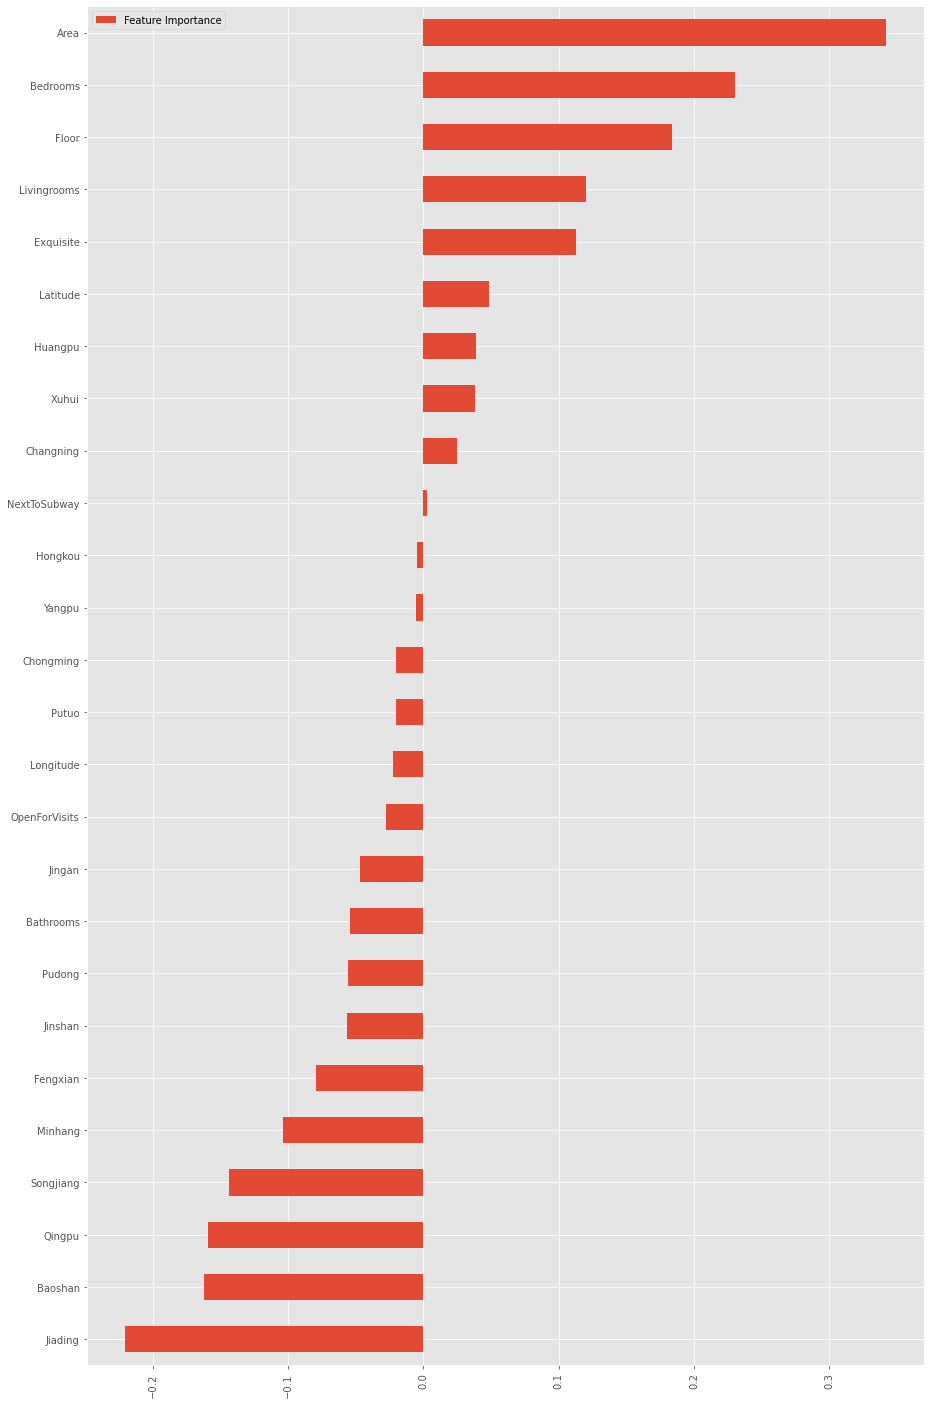

In [49]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [33]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [64]:
models = [LinearRegression(),
          Ridge(),
          Lasso(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          SVR(),
          LinearSVR(),
          ElasticNet(),
          SGDRegressor(),
          BayesianRidge(),
          KernelRidge(),
          ExtraTreesRegressor()]
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]

In [65]:
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.4f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 0.6087, 0.4027
Ridge: 0.4552, 0.1136
Lasso: 0.9563, 0.0516
RF: 0.2387, 0.1850
GBR: 0.2608, 0.1512
SVR: 0.2810, 0.1413
LinSVR: 0.4984, 0.1771
Ela: 0.9100, 0.0635
SGD: 13833344.1827, 14601528.8433
Bay: 0.4550, 0.1134
Ker: 215.9443, 407.7459
Extra: 0.2683, 0.1912


#### RF | GBR | SVR | Extra | looks good, thus try grid search method

In [59]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [77]:
grid(RandomForestRegressor()).grid_get(X_scaled,y_log,{'n_estimators':[10,20,30,40,50]})

{'n_estimators': 40} 0.29362997148808684
                 params  mean_test_score  std_test_score
0  {'n_estimators': 10}         0.306815        0.088415
1  {'n_estimators': 20}         0.303043        0.087897
2  {'n_estimators': 30}         0.302288        0.087425
3  {'n_estimators': 40}         0.293630        0.081148
4  {'n_estimators': 50}         0.305083        0.089156


In [79]:
grid(GradientBoostingRegressor()).grid_get(X_scaled,y_log,{'n_estimators':[110,120,130,140,150],'subsample':[0.3]})

{'n_estimators': 140, 'subsample': 0.3} 0.2869816596738139
                                    params  mean_test_score  std_test_score
0  {'n_estimators': 110, 'subsample': 0.3}         0.294543        0.075578
1  {'n_estimators': 120, 'subsample': 0.3}         0.298035        0.077471
2  {'n_estimators': 130, 'subsample': 0.3}         0.300835        0.081328
3  {'n_estimators': 140, 'subsample': 0.3}         0.286982        0.070524
4  {'n_estimators': 150, 'subsample': 0.3}         0.295819        0.079345


In [82]:
grid(SVR()).grid_get(X_scaled,y_log,{"C":[2,3,4,5,6],"gamma": [0.01,0.02,0.03,0.04,0.05]})

{'C': 5, 'gamma': 0.02} 0.29779976083242227
                     params  mean_test_score  std_test_score
0   {'C': 2, 'gamma': 0.01}         0.317044        0.079729
1   {'C': 2, 'gamma': 0.02}         0.301031        0.073872
2   {'C': 2, 'gamma': 0.03}         0.302986        0.074763
3   {'C': 2, 'gamma': 0.04}         0.310121        0.080949
4   {'C': 2, 'gamma': 0.05}         0.319031        0.087626
5   {'C': 3, 'gamma': 0.01}         0.309968        0.077988
6   {'C': 3, 'gamma': 0.02}         0.298581        0.072623
7   {'C': 3, 'gamma': 0.03}         0.302915        0.076260
8   {'C': 3, 'gamma': 0.04}         0.311105        0.082751
9   {'C': 3, 'gamma': 0.05}         0.318979        0.087898
10  {'C': 4, 'gamma': 0.01}         0.306271        0.077336
11  {'C': 4, 'gamma': 0.02}         0.298120        0.072461
12  {'C': 4, 'gamma': 0.03}         0.303629        0.077329
13  {'C': 4, 'gamma': 0.04}         0.311786        0.083863
14  {'C': 4, 'gamma': 0.05}         0.318

In [83]:
grid(ExtraTreesRegressor()).grid_get(X_scaled,y_log,{'n_estimators':[60,70,80,90]})

{'n_estimators': 80} 0.32774980459768266
                 params  mean_test_score  std_test_score
0  {'n_estimators': 60}         0.335148        0.106923
1  {'n_estimators': 70}         0.328333        0.100667
2  {'n_estimators': 80}         0.327750        0.100094
3  {'n_estimators': 90}         0.327905        0.102133
